# Exploratory Data Analysis and Data Preprocessing

In [289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [377]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [291]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       500 non-null    int64  
 1   B       500 non-null    int64  
 2   C       500 non-null    int64  
 3   D       360 non-null    float64
 4   E       253 non-null    float64
 5   F       492 non-null    float64
 6   G       500 non-null    float64
 7   H       500 non-null    int64  
 8   Target  500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [376]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       268 non-null    int64  
 1   B       268 non-null    int64  
 2   C       268 non-null    float64
 3   D       268 non-null    float64
 4   E       268 non-null    float64
 5   F       268 non-null    float64
 6   G       268 non-null    float64
 7   H       268 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 16.8 KB


In [293]:
train.describe()

,A,B,C,D,E,F,G,H,Target
count,500.000000,500.000000,500.000000,360.000000,253.000000,492.000000,500.000000,500.000000,500.000000
mean,3.876000,121.470000,68.666000,26.308333,106.332016,29.932724,0.472286,33.270000,0.324000
std,3.394653,32.738735,20.288067,13.120056,122.448436,10.624439,0.341394,11.890663,0.468469
min,0.000000,0.000000,0.000000,1.000000,1.000000,2.100000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,18.000000,21.000000,25.375000,0.240000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,27.000000,67.000000,32.000000,0.378000,29.000000,0.000000
75%,6.000000,143.000000,80.000000,35.000000,145.000000,36.025000,0.612250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,59.400000,2.420000,72.000000,1.000000


In [294]:
test.describe()

,A,B,C,D,E,F,G,H
count,268.000000,268.000000,268.000000,181.000000,141.000000,265.000000,268.000000,268.000000
mean,3.787313,119.820896,69.925373,25.016575,104.453901,29.741132,0.471112,33.186567
std,3.327829,30.522872,17.491197,12.651515,106.517234,10.818601,0.312305,11.534782
min,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.084000,21.000000
25%,1.000000,100.000000,64.000000,16.000000,19.000000,25.500000,0.251250,24.000000
50%,3.000000,119.000000,72.000000,26.000000,72.000000,31.600000,0.361500,29.500000
75%,6.000000,137.250000,78.000000,35.000000,168.000000,36.100000,0.643500,39.250000
max,15.000000,196.000000,110.000000,52.000000,545.000000,67.100000,1.893000,81.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1D651250>,
      dtype=object)

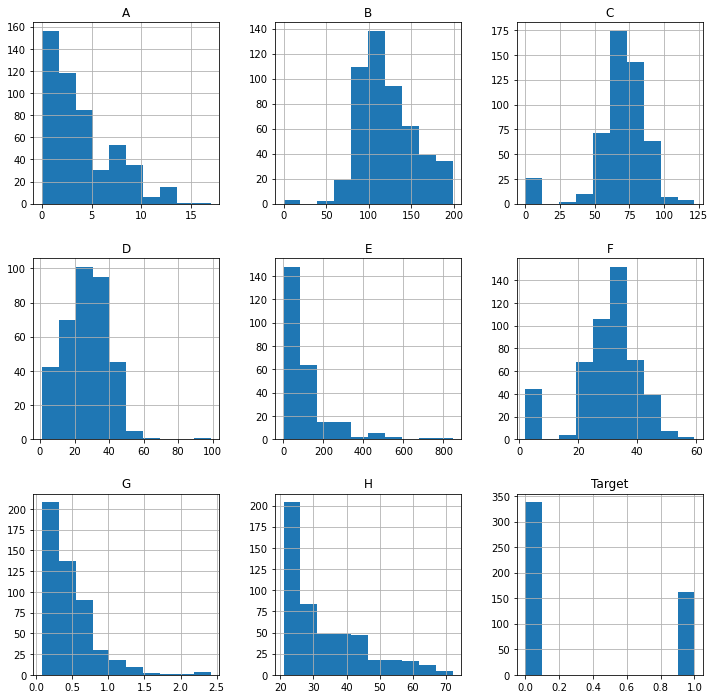

In [295]:
# Plotting histograms
histogram1 = train.hist(bins=10,figsize=(12,12))
histogram1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1E8690E8>,
      dtype=object)

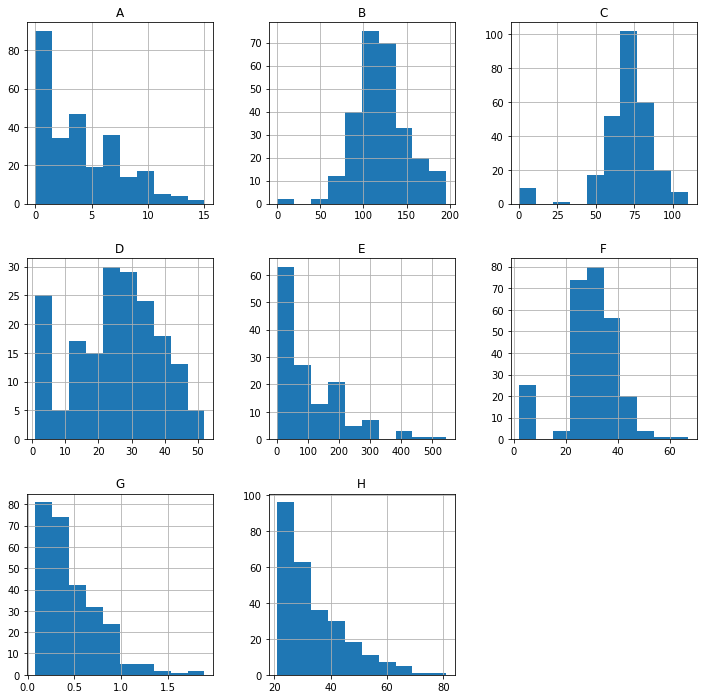

In [296]:
# Plotting histograms
histogram2 = test.hist(bins=10,figsize=(12,12))
histogram2

In [297]:
# Plotting a correlation matrix
corr=train.corr()
corr.style.background_gradient(cmap='coolwarm')

,A,B,C,D,E,F,G,H,Target
A,1.000000,0.161496,0.142327,0.032310,0.021011,0.004478,-0.023769,0.529478,0.211817
B,0.161496,1.000000,0.174969,0.284418,0.446711,0.100974,0.171320,0.293609,0.486576
C,0.142327,0.174969,1.000000,0.191096,-0.089073,0.123435,0.047847,0.236763,0.087737
D,0.032310,0.284418,0.191096,1.000000,0.160339,0.228624,0.139197,0.143920,0.293449
E,0.021011,0.446711,-0.089073,0.160339,1.000000,-0.066960,0.218481,0.185941,0.260938
F,0.004478,0.100974,0.123435,0.228624,-0.066960,1.000000,-0.016863,0.036669,0.208839
G,-0.023769,0.171320,0.047847,0.139197,0.218481,-0.016863,1.000000,0.061109,0.186172
H,0.529478,0.293609,0.236763,0.143920,0.185941,0.036669,0.061109,1.000000,0.222425
Target,0.211817,0.486576,0.087737,0.293449,0.260938,0.208839,0.186172,0.222425,1.000000


#### Checking for null values in train and test dataset

In [298]:
# Checking for null values in train dataset
train.isna().any()

A         False
B         False
C         False
D          True
E          True
F          True
G         False
H         False
Target    False
dtype: bool

In [299]:
# Checking the percentage of missing data in train data
train.isna().sum()/train.shape[0]

A         0.000
B         0.000
C         0.000
D         0.280
E         0.494
F         0.016
G         0.000
H         0.000
Target    0.000
dtype: float64

In [300]:
# Checking for null values in test 
test.isna().any()

A    False
B    False
C    False
D     True
E     True
F     True
G    False
H    False
dtype: bool

In [301]:
# Checking the percentage of missing data in test data
test.isna().sum()/test.shape[0]

A    0.000000
B    0.000000
C    0.000000
D    0.324627
E    0.473881
F    0.011194
G    0.000000
H    0.000000
dtype: float64

#### Data Imputation for Column D

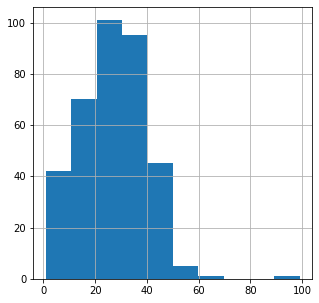

In [302]:
histogram = train['D'].hist(bins=10,figsize=(5,5))
histogram

In [378]:
# Since the column D has a skewed distribution as seen in the histograms above, 
# we will fill NA values with the median of the column.

train['D']=train['D'].fillna((train['D'].median()))
test['D']=test['D'].fillna((test['D'].median()))

#### Data Imputation for Column E

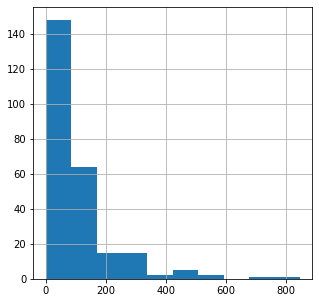

In [304]:
histogram = train['E'].hist(bins=10,figsize=(5,5))
histogram

In [379]:
# Since the column E has a skewed distribution as seen in the histograms above, 
# we will fill NA values with the median of the column

train['E']=train['E'].fillna((train['E'].median()))
test['E']=test['E'].fillna((test['E'].median()))

#### Data Imputation for Column F

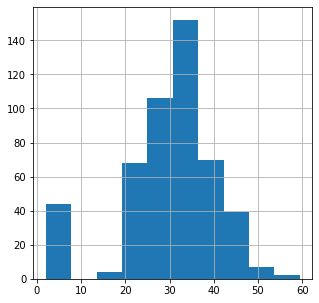

In [306]:
histogram = train['F'].hist(bins=10,figsize=(5,5))
histogram

In [380]:
# Since the column F has a normal distribution as seen in the histogram above, 
# we will fill NA values with the mean of the column
train['F']=train['F'].fillna((train['F'].mean()))
test['F']=test['F'].fillna((test['F'].mean()))

#### Data Imputation for Column C

In [381]:
# As we see that for column C(Diastolic blood pressure) the minimum value is seen as 0, 
# which doesn't seem possible and it may be a human error. Hence, we will replace the zeros with the mean of the column C
 
train['C']=train['C'].replace(0,train['C'].mean())
test['C']=test['C'].replace(0,test['C'].mean())

#### Data Imputation for Column G

In [382]:
# We observe that the column G contains probabilities but there are many values greater than 1.
# Hence, we will replace all the values greater than 1 as 1.

train['G'].values[train['G'] > 1] = 1
test['G'].values[test['G'] > 1] = 1

In [310]:
# Checking the shape of the two datasets
train.shape, test.shape

((500, 9), (268, 8))

# Machine Learning Model

## Splitting the dataset into train and test, Scaling the dataset

In [383]:
X = train.drop(['Target'],axis=1)
y = train['Target']
X.head()

,A,B,C,D,E,F,G,H
0,5,122,86.0,27.0,67.0,34.7,0.290,33
1,2,175,88.0,27.0,67.0,22.9,0.326,22
2,4,129,86.0,2.0,27.0,35.1,0.231,23
3,12,92,62.0,7.0,258.0,27.6,0.926,44
4,3,102,44.0,2.0,94.0,3.8,0.400,26


In [312]:
y

0      0
1      0
2      0
3      1
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Target, Length: 500, dtype: int64

In [384]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

## Logistic Regression

In [314]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c,solver='liblinear')
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

In [315]:
print(train_score_l1)
print(test_score_l1)
print(train_score_l2)
print(test_score_l2)

[0.6746666666666666, 0.6746666666666666, 0.6746666666666666, 0.7893333333333333, 0.7893333333333333, 0.7866666666666666, 0.7866666666666666]
[0.68, 0.68, 0.68, 0.776, 0.784, 0.784, 0.784]
[0.6746666666666666, 0.6746666666666666, 0.6906666666666667, 0.7946666666666666, 0.7946666666666666, 0.7866666666666666, 0.7866666666666666]
[0.68, 0.68, 0.68, 0.776, 0.784, 0.784, 0.784]


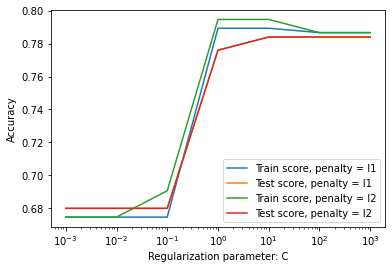

In [316]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

#### We get the best score for penalty = L2  and C = 1 . Train Score: 0.7946 , Test Score: 0.784

## KNeighbours Classifier

In [317]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

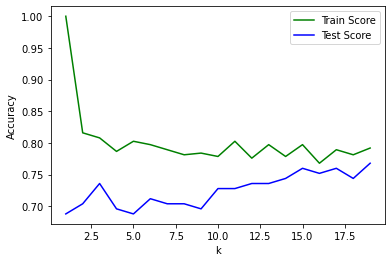

In [318]:
x_axis = range(1,20,1)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [329]:
# As seen from the graph above, we get best scores for n = 19 
knn = KNeighborsClassifier(19)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.7920
Test score: 0.7680


#### We get the best score for n = 19 . Train Score: 0.792 , Test Score: 0.768

## Decision Tree

In [330]:
%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.688


In [331]:
train_score_array = []
test_score_array = []

for k in range(1,20,1):
    dtrees = DecisionTreeClassifier(max_depth=k)
    dtrees.fit(X_train, y_train)
    train_score_array.append(dtrees.score(X_train, y_train))
    test_score_array.append(dtrees.score(X_test, y_test))

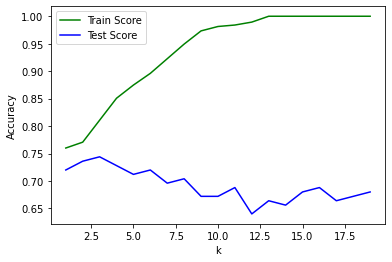

In [332]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [336]:
# As we see in the above graph, we get the best scores for depth = 3 
dtree = DecisionTreeClassifier(max_depth=3, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.811
Accuracy on test set: 0.744


#### We get the best score for depth = 3 . Train Score: 0.811 , Test Score: 0.744

## LinearSVC

In [338]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

print("Size of training set: {}   size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for C in [0.001,0.01, 0.1, 1, 10,100]:
    svm = LinearSVC(C=C,dual=False)
    svm.fit(X_train, y_train)
    score = svm.score(X_test, y_test)
    score1 = svm.score(X_train,y_train)
    if score > best_score:
        best_score = score
        best_train_score = score1
        best_parameters = {'C': C}

print("Best train score: {:.4f}".format(best_train_score))
print("Best test score: {:.4f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 375   size of test set: 125
Best train score: 0.7893
Best test score: 0.7840
Best parameters: {'C': 1}


#### We get the best score for C = 1 . Train Score: 0.7893 , Test Score: 0.7840

# SVC with Linear Kernel

In [345]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(kernel = 'linear'), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [346]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best training score: {}".format(grid_search.score(X_train,y_train)))
print("Best testing score: {:.2f}".format(grid_search.score(X_test,y_test)))

Best parameters: {'C': 10, 'gamma': 0.001}
Best cross-validation score: 0.79
Best training score: 0.8
Best testing score: 0.78


#### We get the best score for C = 10 and Gamma = 0.001. Train Score: 0.80 , Test Score: 0.78

# SVC with Poly Kernel

In [343]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(kernel = 'poly'), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(kernel='poly'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [344]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best training score: {}".format(grid_search.score(X_train,y_train)))
print("Best testing score: {:.2f}".format(grid_search.score(X_test,y_test)))

Best parameters: {'C': 0.1}
Best cross-validation score: 0.81
Best training score: 0.8186666666666667
Best testing score: 0.78


#### We get the best score for C = 0.1 . Train Score: 0.8186 , Test Score: 0.78

# SVC with RBF Kernel

In [347]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [354]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best training score: {:.4f}".format(grid_search.score(X_train,y_train)))
print("Best testing score: {:.4f}".format(grid_search.score(X_test,y_test)))

Best parameters: {'C': 1, 'gamma': 1}
Best cross-validation score: 0.81
Best training score: 0.8213
Best testing score: 0.7920


#### We get the best score for C = 1 and Gamma = 1 . Train Score: 0.8213 , Test Score: 0.792

# Final Prediction

#### We choose the SVC with RBF Kernel model since it gives the best scores

In [385]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

model = SVC(kernel='rbf', gamma=1, C=1)
model.fit(X_train, y_train)

SVC(C=1, gamma=1)

In [388]:
scaler = MinMaxScaler()
test_x = scaler.fit_transform(test)

In [389]:
test_predict = model.predict(test_x)
test_predict = pd.DataFrame(test_predict,index=test.index,columns=['Target'])
test_predict

,Target
0,1
1,0
2,0
3,0
4,1
...,...
263,1
264,0
265,0
266,0


In [390]:
test_predict.to_csv('test.csv', mode='a', index = False)